In [1]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()


Run     Event      pt1    eta1    phi1  Q1    dxy1    iso1      pt2  \
0  165617  74969122  54.7055 -0.4324  2.5742   1 -0.0745  0.4999  34.2464   
1  165617  75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000  28.5389   
2  165617  75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000  30.2344   
3  165617  75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000  48.2790   
4  165617  75098104  41.2998 -0.1571 -3.0408   1 -0.0305  1.2280  43.4508   

     eta2    phi2  Q2    dxy2    iso2  
0 -0.9885 -0.4987  -1  0.0712  3.4221  
1  0.3852 -1.9912   1  0.0515  0.0000  
2 -0.4684  1.8833   1 -0.0876  0.0000  
3 -0.1956  2.9703  -1 -0.0492  0.0000  
4  0.5910 -0.0428  -1  0.0442  0.0000

In [3]:
particles.describe()

Run         Event           pt1          eta1         phi1  \
count   10000.00000  1.000000e+04  10000.000000  10000.000000  10000.00000   
mean   168783.06370  4.019532e+08     38.403231     -0.278699     -0.23353   
std      3929.76919  3.492634e+08     14.427817      1.352768      1.80456   
min    160957.00000  8.922000e+04      3.463700     -2.437500     -3.14140   
25%    166033.00000  1.250350e+08     30.160275     -1.429850     -1.77995   
50%    167102.00000  3.206396e+08     38.883850     -0.557000     -0.42945   
75%    173381.00000  5.666747e+08     45.057750      1.094800      1.30270   
max    173692.00000  1.245305e+09    269.080000      2.099700      3.14140   

                 Q1          dxy1          iso1           pt2          eta2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.031200      0.006345      1.514267     38.639360      0.079500   
std        0.999563      0.074693      6.353057     15.945227      0.871556   
min       -1.000000     -3.588000      0.000000      3.266200     -2.428000   
25%       -1.000000     -0.051500      0.000000     30.033800     -0.566525   
50%       -1.000000      0.012100      0.000000     38.932350      0.076450   
75%        1.000000      0.066500      0.478550     45.194675      0.738500   
max        1.000000      2.027700    184.728000    528.434000      2.099200   

               phi2            Q2         dxy2          iso2  
count  10000.000000  10000.000000  10000.00000  10000.000000  
mean       0.250883      0.038400      0.01058      1.732420  
std        1.787396      0.999312      1.78079      6.812311  
min       -3.141500     -1.000000     -2.00520      0.000000  
25%       -1.258575     -1.000000     -0.06740      0.000000  
50%        0.406600      1.000000     -0.01315      0.000000  
75%        1.803625      1.000000      0.05290      0.527525  
max        3.140900      1.000000    177.93100    151.295000

# Visualizacion de variables numericas

### variables numericas sin filtrar

In [4]:
particles_num = particles.iloc[:,2:]
particles_num2 = particles_num.drop(columns=["Q1","Q2"])

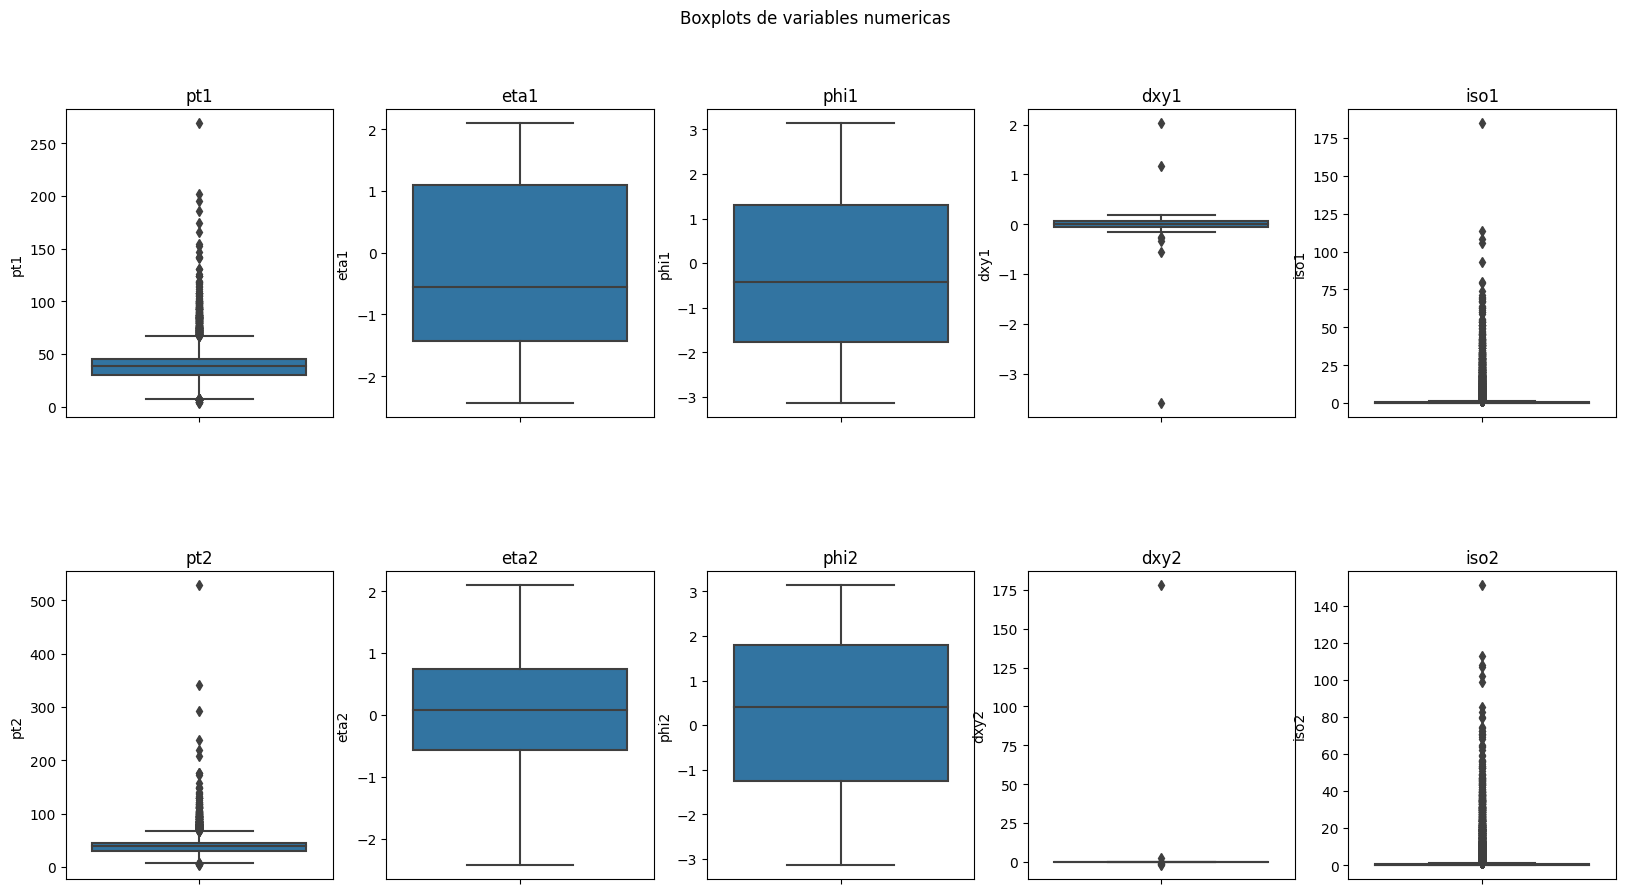

In [5]:
# Crea una figura con 10 subplots (uno para cada columna)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

# Itera a través de las columnas y crea los boxplots
for i, column in enumerate(particles_num2.columns):
    row = i // 5
    col = i % 5
    sns.boxplot(data=particles_num2, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Boxplots de variables numericas')

# Muestra la figura
plt.show()

Observamos que existen datos atipicos en los datos, principalmente en las variables Pt1, Pt2, dxy1, dxy2, iso1 e iso2

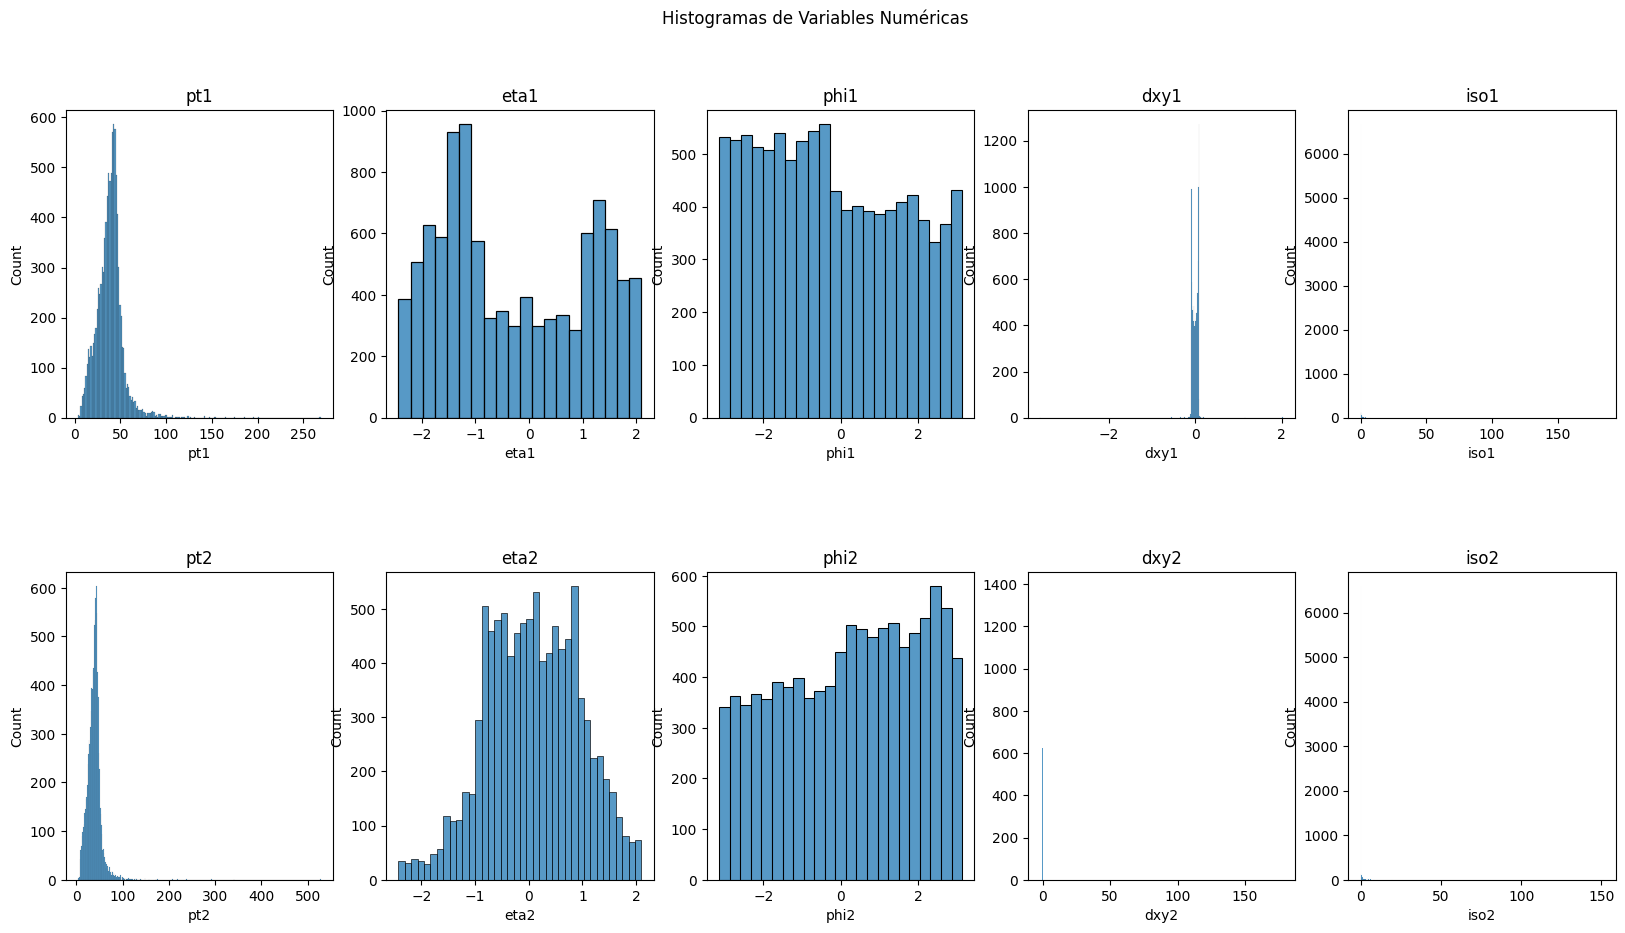

In [6]:
# Crea una figura con 10 subplots (uno para cada columna)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

# Itera a través de las columnas y crea los histogramas
for i, column in enumerate(particles_num2.columns):
    row = i // 5
    col = i % 5
    sns.histplot(data=particles_num2, x=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Histogramas de Variables Numéricas')

# Muestra la figura
plt.show()

Observamos que distribucion de los datos de eta1 y eta2, asi como los de phi1 y phi2 tienen una relacion de completitud, mientras que la distribucion de pt1 y pt2 son muy similares. Igualmente, vemos que los datos para los casos de dxy, iso, son mayormente cercanos a cero.

In [12]:
df_iso_mayor = particles[(particles["iso1"]>1) | (particles["iso2"]>1)]
df_iso_mayor[particles["Q1"] == particles["Q2"]]

<ipython-input-12-6620655c93fb>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Run       Event      pt1    eta1    phi1  Q1    dxy1      iso1  \
19    165617    78693707  21.3986 -1.6865  0.0905   1  0.0263    4.4573   
95    165617    94212340  14.9992  1.6421  2.4363  -1 -0.3397    0.0000   
113   165617    96375401  21.9996  1.1763  2.1764   1 -0.0834  184.7280   
157   165617   104730772  36.2004  1.4893  0.4355  -1  0.0026    1.3959   
165   165617   106617185  17.2939 -1.2052  0.7373   1 -0.0290    0.6563   
...      ...         ...      ...     ...     ...  ..     ...       ...   
9857  173692  1230599939  30.9326 -1.7441 -3.0784   1 -0.0472    3.1380   
9921  173692  1237009175  12.4843 -1.8987  2.5599  -1 -0.0967    4.7659   
9933  173692  1239095530   8.7469 -1.3595  0.7881   1 -0.0198    0.0000   
9952  173692  1240516409  12.9582 -1.7949  1.5804  -1 -0.0695    1.4734   
9995  173692  1245050481   8.9721 -1.6158 -2.7176   1 -0.0294    8.7183   

          pt2    eta2    phi2  Q2    dxy2      iso2  
19    10.8491  1.2098  3.0488   1 -0.0430   38.1065  
95    22.7487 -0.7225 -0.2626  -1  0.0581    2.3225  
113   33.9558  0.0720 -0.9118   1  0.0808  112.7960  
157   11.9339 -0.6476 -2.1759  -1  0.0349    2.5531  
165   31.9684  0.2569 -2.2568   1  0.0337    2.6572  
...       ...     ...     ...  ..     ...       ...  
9857  15.3897  0.3401  0.8521   1 -0.0221   72.6844  
9921  23.5704  0.7574  2.2399  -1 -0.0360    0.3975  
9933  18.0814  1.7652 -2.1067   1  0.0103    1.0554  
9952  25.7163  0.7740 -1.7689  -1  0.0603    6.4304  
9995  13.5266  1.8709  2.7911   1 -0.0689    0.4202  

[319 rows x 14 columns]

Dentro de los datos que tienen al menos un muon con una $iso > 1$, notamos que existen 319 eventos donde no se cumple la conservacion de la carga. Donde, en total, en todo el dataset tenemos 336 eventos donde no se conserva la carga. Es decir, la mayor cantidad de eventos donde no se conserva la carga electrica ocurre cuando uno de los dos muones tiene una $iso > 1$.

## Sub df que solo contiene eventos que no conservan la carga electrica

Casos donde no se cumple la conservacion de la carga electrica.

Tenemos 336 eventos donde la carga de los dos muones son iguales.

In [13]:
particles_no_C = particles[particles["Q1"] == particles["Q2"]]
particles_no_Cnum = particles_no_C.drop(columns = ["Q1", "Q2", "Run", "Event"])
particles_no_Cnum

pt1    eta1    phi1    dxy1      iso1      pt2    eta2    phi2  \
19    21.3986 -1.6865  0.0905  0.0263    4.4573  10.8491  1.2098  3.0488   
95    14.9992  1.6421  2.4363 -0.3397    0.0000  22.7487 -0.7225 -0.2626   
113   21.9996  1.1763  2.1764 -0.0834  184.7280  33.9558  0.0720 -0.9118   
157   36.2004  1.4893  0.4355  0.0026    1.3959  11.9339 -0.6476 -2.1759   
165   17.2939 -1.2052  0.7373 -0.0290    0.6563  31.9684  0.2569 -2.2568   
...       ...     ...     ...     ...       ...      ...     ...     ...   
9921  12.4843 -1.8987  2.5599 -0.0967    4.7659  23.5704  0.7574  2.2399   
9933   8.7469 -1.3595  0.7881 -0.0198    0.0000  18.0814  1.7652 -2.1067   
9952  12.9582 -1.7949  1.5804 -0.0695    1.4734  25.7163  0.7740 -1.7689   
9962  26.6574  1.7058  2.3984 -0.1013    0.0000  19.7586 -0.8027 -1.1238   
9995   8.9721 -1.6158 -2.7176 -0.0294    8.7183  13.5266  1.8709  2.7911   

        dxy2      iso2  
19   -0.0430   38.1065  
95    0.0581    2.3225  
113   0.0808  112.7960  
157   0.0349    2.5531  
165   0.0337    2.6572  
...      ...       ...  
9921 -0.0360    0.3975  
9933  0.0103    1.0554  
9952  0.0603    6.4304  
9962  0.0860    0.0000  
9995 -0.0689    0.4202  

[336 rows x 10 columns]

# Removiendo outliers

In [15]:
particles.describe()

Run         Event           pt1          eta1         phi1  \
count   10000.00000  1.000000e+04  10000.000000  10000.000000  10000.00000   
mean   168783.06370  4.019532e+08     38.403231     -0.278699     -0.23353   
std      3929.76919  3.492634e+08     14.427817      1.352768      1.80456   
min    160957.00000  8.922000e+04      3.463700     -2.437500     -3.14140   
25%    166033.00000  1.250350e+08     30.160275     -1.429850     -1.77995   
50%    167102.00000  3.206396e+08     38.883850     -0.557000     -0.42945   
75%    173381.00000  5.666747e+08     45.057750      1.094800      1.30270   
max    173692.00000  1.245305e+09    269.080000      2.099700      3.14140   

                 Q1          dxy1          iso1           pt2          eta2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.031200      0.006345      1.514267     38.639360      0.079500   
std        0.999563      0.074693      6.353057     15.945227      0.871556   
min       -1.000000     -3.588000      0.000000      3.266200     -2.428000   
25%       -1.000000     -0.051500      0.000000     30.033800     -0.566525   
50%       -1.000000      0.012100      0.000000     38.932350      0.076450   
75%        1.000000      0.066500      0.478550     45.194675      0.738500   
max        1.000000      2.027700    184.728000    528.434000      2.099200   

               phi2            Q2         dxy2          iso2  
count  10000.000000  10000.000000  10000.00000  10000.000000  
mean       0.250883      0.038400      0.01058      1.732420  
std        1.787396      0.999312      1.78079      6.812311  
min       -3.141500     -1.000000     -2.00520      0.000000  
25%       -1.258575     -1.000000     -0.06740      0.000000  
50%        0.406600      1.000000     -0.01315      0.000000  
75%        1.803625      1.000000      0.05290      0.527525  
max        3.140900      1.000000    177.93100    151.295000

In [ ]:
#esta funcion realiza la eliminacion de las colas de todas las variables numericas
#def remove_outliers(df, threshold=1.5):
    # Seleccionar solo las columnas numéricas de tipo float64
#    numeric_columns = df.select_dtypes(include=['float64'])

    # Crear una copia del DataFrame original
#    df_filtered = df.copy()

#    for column in numeric_columns.columns:
#        Q1 = numeric_columns[column].quantile(0.25)
#        Q3 = numeric_columns[column].quantile(0.75)

#        IQR = Q3 - Q1

#        lower_bound = Q1 - threshold * IQR
#        upper_bound = Q3 + threshold * IQR

        # Filtrar las filas que no contienen outliers en la columna actual
#        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

#    return df_filtered

#particles_sinOutliers = remove_outliers(particles)
#particles_sinOutliers

In [78]:
#esta funcion solo elimina las colas de las variables que presentan outliers
def remove_outliers(df, threshold=1.5):
    # Crear una copia del DataFrame original
    df_filtered = df.copy()

    Q1s = df_filtered["iso1"].quantile(0.25)
    Q3s = df_filtered["iso1"].quantile(0.75)

    Q1s2 = df_filtered["iso2"].quantile(0.25)
    Q3s2 = df_filtered["iso2"].quantile(0.75)

    Q1d = df_filtered["dxy1"].quantile(0.25)
    Q3d = df_filtered["dxy1"].quantile(0.75)

    Q1d2 = df_filtered["dxy2"].quantile(0.25)
    Q3d2 = df_filtered["dxy2"].quantile(0.75)

    IQRd = Q3d - Q1d
    IQRd2 = Q3d2 - Q1d2

    IQRs = Q3s - Q1s
    IQRs2 = Q3s2 - Q1s2

    lower_bounds = Q1s - threshold * IQRs
    upper_bounds = Q3s + threshold * IQRs

    lower_bounds2 = Q1s2 - threshold * IQRs2
    upper_bounds2 = Q3s2 + threshold * IQRs2

    lower_boundd = Q1d - threshold * IQRd
    upper_boundd = Q3d + threshold * IQRd

    lower_boundd2 = Q1d2 - threshold * IQRd2
    upper_boundd2 = Q3d2 + threshold * IQRd2

    # Filtra los datos para que solo devuel
    df_filtered = df_filtered[(df_filtered["iso1"] >= lower_bounds) & (df_filtered["iso1"] <= upper_bounds) & (df_filtered["iso2"] >= lower_bounds2) & (df_filtered["iso2"] <= upper_bounds2)
    & (df_filtered["dxy1"] >= lower_boundd) & (df_filtered["dxy1"] <= upper_boundd) & (df_filtered["dxy2"] >= lower_boundd2) & (df_filtered["dxy2"] <= upper_boundd2)
                              ]

    return df_filtered

particles_sinOutliers = remove_outliers(particles)
particles_sinOutliers

Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
1     165617    75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000   
2     165617    75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000   
3     165617    75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000   
5     165617    77255513  38.9425  0.3522 -2.2649  -1  0.0384  0.0000   
8     165617    77076988  38.1511 -0.8702  1.7165   1 -0.0840  0.0000   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9994  173692  1244153861  38.1252 -0.4428 -2.2370  -1  0.0311  0.0000   
9996  173692  1244979327  39.4543 -1.1310 -2.0568   1  0.0417  0.0000   
9997  173692  1245305163  40.6034 -1.5051 -1.6758  -1  0.0635  0.2012   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   
9999  173692  1244770092  40.7389  1.1202 -0.2863  -1  0.0670  0.6457   

          pt2    eta2    phi2  Q2    dxy2    iso2       masa  
1     28.5389  0.3852 -1.9912   1  0.0515  0.0000  88.812177  
2     30.2344 -0.4684  1.8833   1 -0.0876  0.0000  88.474683  
3     48.2790 -0.1956  2.9703  -1 -0.0492  0.0000  90.332429  
5     39.8616  0.2630  0.9183   1 -0.0407  0.0000  78.860090  
8     37.8959  0.5000 -1.8676  -1  0.0652  0.0000  93.118675  
...       ...     ...     ...  ..     ...     ...        ...  
9994  40.7930  0.6067  1.0012   1 -0.0403  0.3160  89.903304  
9996  47.7209 -0.1834  1.7965  -1 -0.0794  0.0000  91.859015  
9997  44.4382 -1.0010  1.5380   1 -0.0671  1.1499  87.614328  
9998  41.0945 -0.1200  0.8850  -1 -0.0291  0.0000  90.844048  
9999  30.6292 -0.3396  2.8693   1 -0.0687  0.0000  90.316659  

[7799 rows x 15 columns]

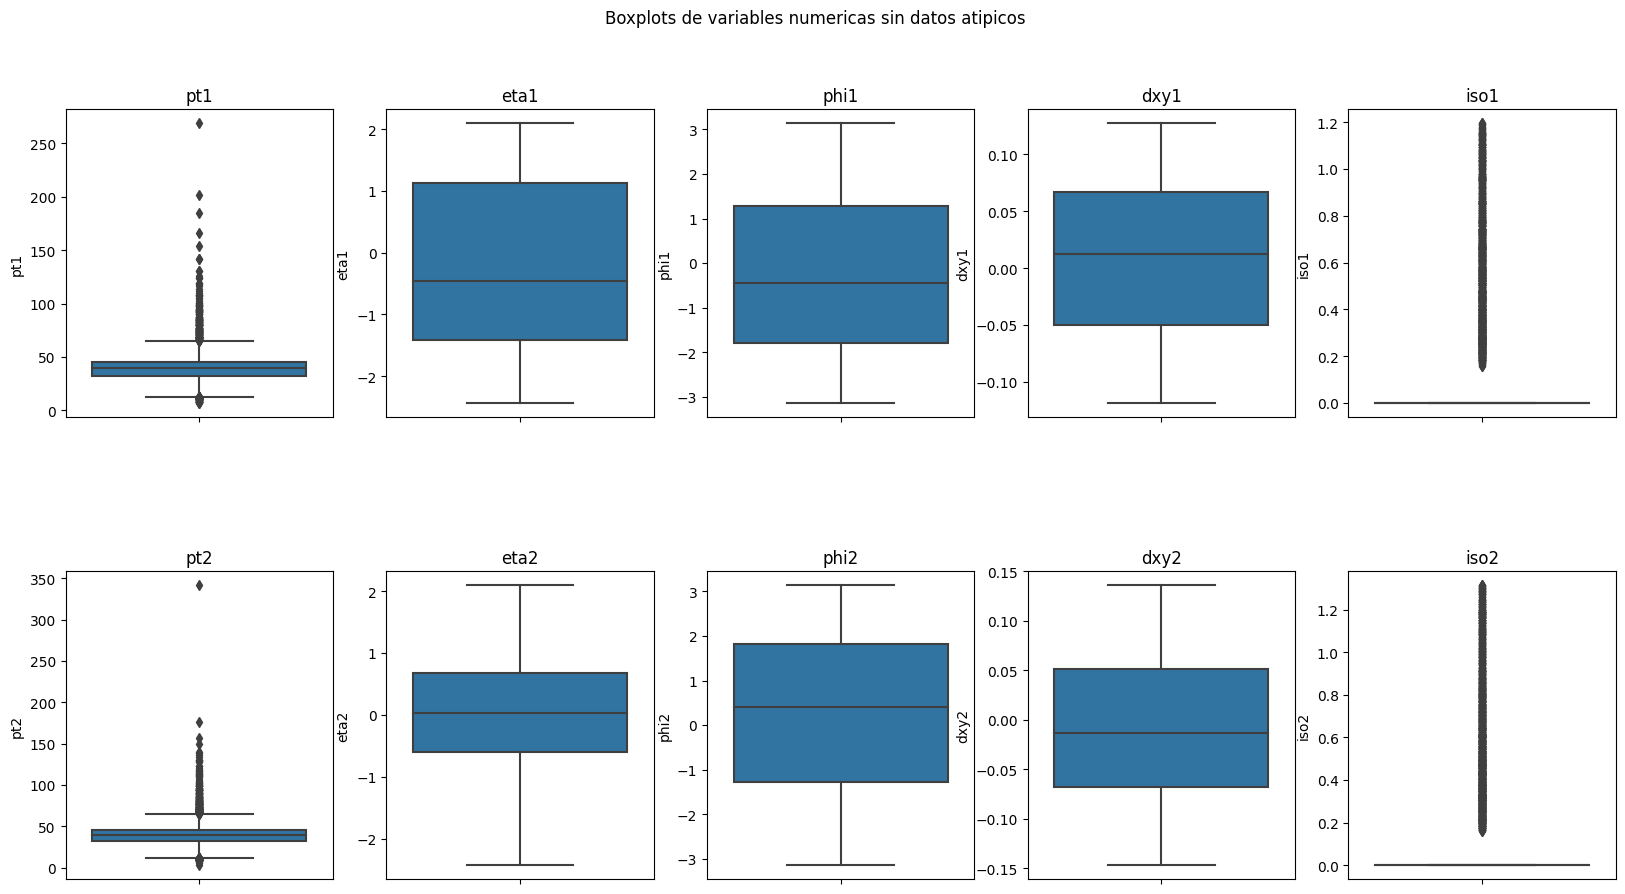

In [79]:
particles_num2_sinOutliers = particles_sinOutliers.drop(columns=["Run", "Event", "Q1", "Q2"])

# Crea una figura con 10 subplots (uno para cada columna)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

# Itera a través de las columnas y crea los boxplots
for i, column in enumerate(particles_num2_sinOutliers.columns):
    row = i // 5
    col = i % 5
    sns.boxplot(data=particles_num2_sinOutliers, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Boxplots de variables numericas sin datos atipicos')

# Muestra la figura
plt.show()

Notamos que los datos ya son más normales, dado que el valor máximo de las iso es menor a 1.5

Text(0.5, 1.0, 'Mapa de calor para el dataframe sin datos atipicos')

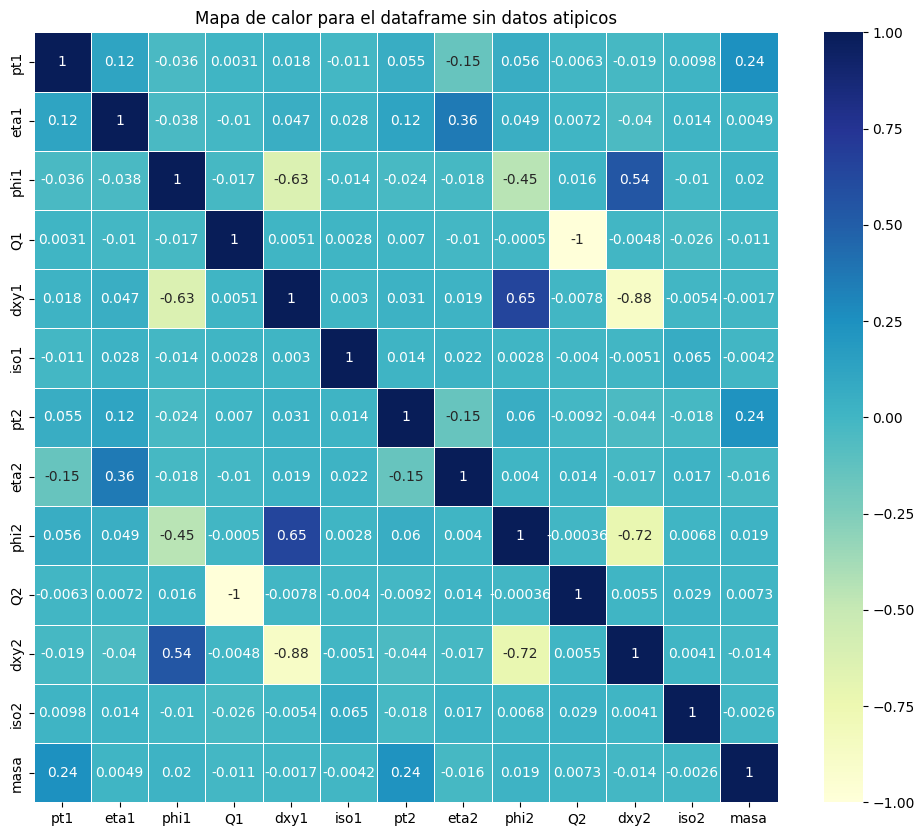

In [80]:
plt.figure(figsize=(12, 10))

particles_num3_sinOutliers = particles_sinOutliers.drop(columns=["Run", "Event"])
sns.heatmap(particles_num3_sinOutliers.corr(),vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title("Mapa de calor para el dataframe sin datos atipicos")

Cantidad de datos

In [81]:
particles_sinOutliers[particles_sinOutliers["Q1"] == particles_sinOutliers["Q2"]]

Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
791   166784    41188406   9.9650 -2.1936  2.3125   1 -0.1016  0.0000   
920   166784    56702434  26.5303 -1.0559 -2.6652   1 -0.0017  0.0000   
1569  160957   136828668  16.0026 -1.0894 -2.8413   1 -0.1186  0.0000   
1718  166033   443511688   7.8763 -2.1856 -2.3657   1  0.0364  0.0000   
2721  173430   218253846  13.5286 -1.8269  0.4973   1  0.0143  0.0000   
2751  173430   223373414  50.4473  0.4780 -0.8524  -1  0.1149  0.0000   
3770  173692   534309075   6.6953 -2.3573 -1.4639   1 -0.0725  0.0000   
3818  173692   541224136  38.3829  1.4208  2.8808   1 -0.0656  0.0000   
5280  166895    87921553  15.6435 -1.8767 -2.5316   1  0.0128  0.0000   
6559  167102   347207745  55.7425 -1.5682 -2.4341   1  0.0185  0.0000   
7230  173692   336028326  36.4081  2.0440  3.1235   1 -0.0494  0.0000   
7636  173692   381601910  45.4269 -1.0947  2.3981   1 -0.0809  0.0000   
9486  173381   243084772  47.9935 -0.5225 -3.1395   1 -0.0460  0.7254   
9555  173381   250092792  21.1246  1.8969 -1.7861  -1  0.0646  0.7777   
9933  173692  1239095530   8.7469 -1.3595  0.7881   1 -0.0198  0.0000   
9962  173692  1241426747  26.6574  1.7058  2.3984  -1 -0.1013  0.0000   

          pt2    eta2    phi2  Q2    dxy2    iso2       masa  
791   17.6332  1.2779  0.7069   1 -0.0570  0.9325  75.319767  
920   17.1284  1.2017  0.4763   1  0.0215  0.8496  72.805906  
1569  11.8066  1.7954  0.1917   1  0.0108  0.0000  61.385334  
1718  14.0686  1.3538  2.4468   1 -0.0814  0.5320  61.627955  
2721  15.0007  1.2307 -0.6654   1  0.0774  0.8209  64.546630  
2751  15.7106 -0.6588  2.2030  -1 -0.0519  0.0000  65.602923  
3770  23.4451  1.6812 -2.9091   1 -0.0286  0.0000  94.181809  
3818  43.6338  1.1951 -0.3265   1  0.1069  0.0000  82.326280  
5280  29.9378  0.7889  0.5891   1 -0.0597  0.0000  87.761292  
6559  18.7296 -0.3118  1.6426   1 -0.1467  0.0000  72.141544  
7230  35.3301  0.5323 -0.2478   1  0.0610  0.0000  92.851239  
7636  42.3175 -0.5418 -0.7827   1  0.0898  0.0000  91.045268  
9486  42.4145 -0.0174 -0.0654   1  0.0491  0.3642  93.078931  
9555  11.7234 -0.6882  1.3486  -1 -0.0701  0.0000  61.635809  
9933  18.0814  1.7652 -2.1067   1  0.0103  1.0554  62.547727  
9962  19.7586 -0.8027 -1.1238  -1  0.0860  0.0000  86.558432

En el dataframe sin outliers solo tenemos 16 eventos que no conservan la carga electrica.

In [21]:
particles_num2_sinOutliers.describe()

pt1         eta1         phi1         dxy1         iso1  \
count  7390.000000  7390.000000  7390.000000  7390.000000  7390.000000   
mean     38.581967    -0.240514    -0.251264     0.007177     0.122591   
std      10.147591     1.362891     1.797047     0.060098     0.264723   
min       7.876300    -2.437500    -3.141400    -0.118600     0.000000   
25%      32.459025    -1.415400    -1.786550    -0.050000     0.000000   
50%      39.573000    -0.470550    -0.455100     0.012700     0.000000   
75%      44.967325     1.140975     1.276325     0.066975     0.000000   
max      67.400700     2.099700     3.141400     0.127400     1.195800   

               pt2         eta2         phi2         dxy2         iso2  
count  7390.000000  7390.000000  7390.000000  7390.000000  7390.000000  
mean     38.558681     0.031377     0.247869    -0.007335     0.136488  
std      10.105685     0.865134     1.795113     0.060535     0.291525  
min       7.567800    -2.428000    -3.141500    -0.146700     0.000000  
25%      32.125800    -0.596775    -1.290925    -0.067700     0.000000  
50%      39.566650     0.037150     0.416150    -0.013150     0.000000  
75%      44.924050     0.686800     1.809900     0.051200     0.000000  
max      67.776400     2.098100     3.140900     0.136000     1.315400

#visualizacion de vectores de momento transversal

Ahora queremos reconstruir los momentos transversales del par de muones. Para esto usaremos la normal del momento transversal Pt1 y Pt2, así como el angulo azimutal phi1 y phi2, con los cuales podemos definir las componentes X y Y del vector de momento transversal

$$ P_{tx1} = P_{t1} \cos{\phi_1} $$
$$ P_{ty1} = P_{t1} \sin{\phi_1} $$
Lo mismo para el vector $P_{t2}$.


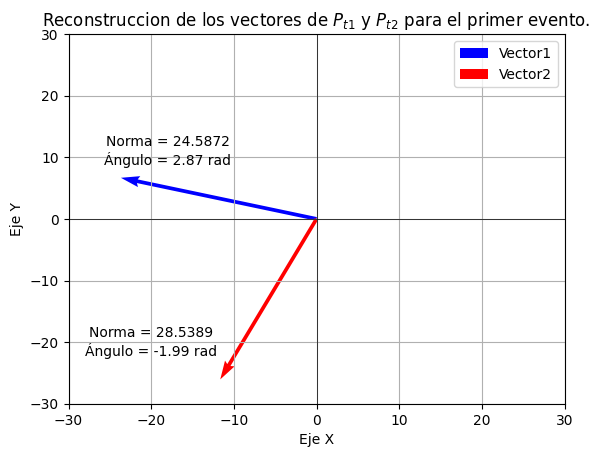

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Datos del vector
norma1 = particles_num2_sinOutliers.iloc[0,0]
angulo_radianes1 = particles_num2_sinOutliers.iloc[0,2]

norma2 = particles_num2_sinOutliers.iloc[0,5]
angulo_radianes2 = particles_num2_sinOutliers.iloc[0,7]


# Calcular componentes del vector
Vx1 = norma1 * np.cos(angulo_radianes1)
Vy1 = norma1 * np.sin(angulo_radianes1)

Vx2 = norma2 * np.cos(angulo_radianes2)
Vy2 = norma2 * np.sin(angulo_radianes2)

# Crear la figura y el eje
fig, ax = plt.subplots()

# Dibujar el vector
ax.quiver(0, 0, Vx1, Vy1, angles='xy', scale_units='xy', scale=1, color='blue', label='Vector1')
ax.quiver(0, 0, Vx2, Vy2, angles='xy', scale_units='xy', scale=1, color='red', label='Vector2')

# Configurar límites de los ejes
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)

# Etiquetas de ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

# Etiqueta del vector
ax.text(-18, 11, f'Norma = {norma1}\nÁngulo = {angulo_radianes1:.2f} rad', ha='center', va='center')

ax.text(-20, -20, f'Norma = {norma2}\nÁngulo = {angulo_radianes2:.2f} rad', ha='center', va='center')

# Mostrar leyenda
ax.legend()

# Mostrar la gráfica
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Reconstruccion de los vectores de $P_{t1}$ y $P_{t2}$ para el primer evento.")
plt.show()


In [40]:
vx1=[]
vy1=[]

vx2=[]
vy2=[]
for i in range(len(particles_num2_sinOutliers)):
  # Datos del vector
  norma1 = particles_num2_sinOutliers.iloc[i,0]
  angulo_radianes1 = particles_num2_sinOutliers.iloc[i,2]

  norma2 = particles_num2_sinOutliers.iloc[i,5]
  angulo_radianes2 = particles_num2_sinOutliers.iloc[i,7]


  # Calcular componentes del vector
  Vx1 = norma1 * np.cos(angulo_radianes1)
  Vy1 = norma1 * np.sin(angulo_radianes1)

  Vx2 = norma2 * np.cos(angulo_radianes2)
  Vy2 = norma2 * np.sin(angulo_radianes2)

  vx1.append(Vx1)
  vy1.append(Vy1)
  vx2.append(Vx2)
  vy2.append(Vy2)

  #Esto imprime n graficas para cada par de vectores P_{t1} y P_{t2}
  # Crear la figura y el eje
  #fig, ax = plt.subplots()

  # Dibujar el vector
  #ax.quiver(0, 0, Vx1, Vy1, angles='xy', scale_units='xy', scale=1, color='blue', label='Vector1')
  #ax.quiver(0, 0, Vx2, Vy2, angles='xy', scale_units='xy', scale=1, color='blue', label='Vector2')

  # Configurar límites de los ejes
  #ax.set_xlim(-30, 30)
  #ax.set_ylim(-30, 30)

  # Etiquetas de ejes
  #ax.set_xlabel('Eje X')
  #ax.set_ylabel('Eje Y')

  # Etiqueta del vector
  #ax.text(Vx1 / 2, Vy1/ 2, f'Norma = {norma}\nÁngulo = {angulo_radianes:.2f} rad', ha='center', va='center')

  # Mostrar leyenda
  #ax.legend()

  # Mostrar la gráfica
  #plt.grid()
  #plt.axhline(0, color='black',linewidth=0.5)
  #plt.axvline(0, color='black',linewidth=0.5)
  #plt.show()




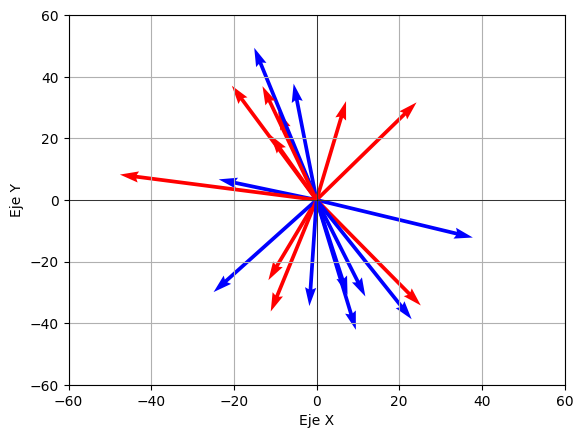

In [66]:
import matplotlib.pyplot as plt

#numero de pares de vectores de momento transversal deseados en la grafica
n=  10

# Crear la figura y el eje
fig, ax = plt.subplots()

# Configurar límites de los ejes
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)

# Etiquetas de ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

# Dibujar los vectores
for i in range(n):
    ax.quiver(0, 0, vx1[i], vy1[i], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector1')
    ax.quiver(0, 0, vx2[i], vy2[i], angles='xy', scale_units='xy', scale=1, color='red', label='Vector2')

# Mostrar leyenda
# ax.legend()

# Mostrar la gráfica
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


Grafica de dispersion con densidad para las componentes $P_{tx2}$ y $P_{ty2}$

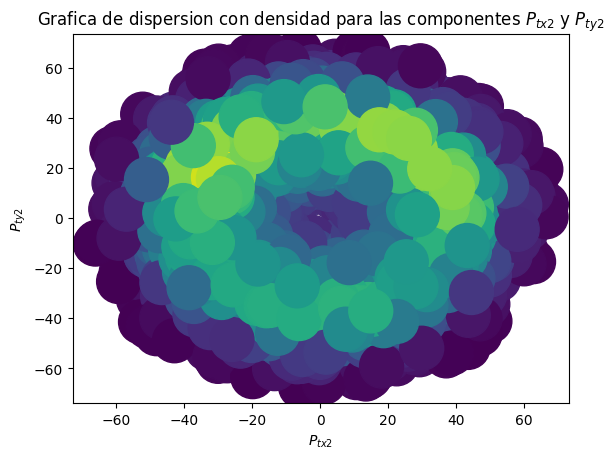

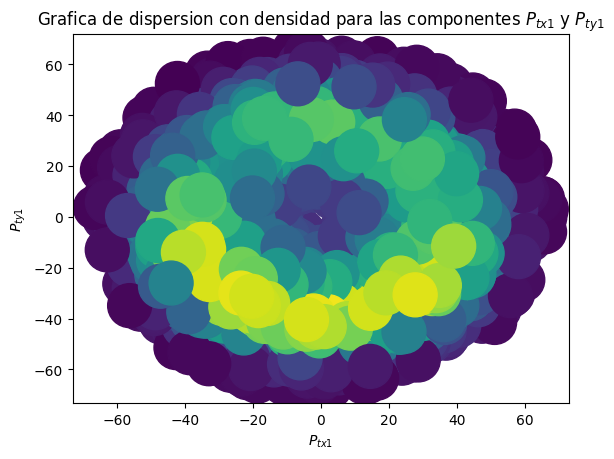

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
x1y1 = np.vstack([vx1,vy1])
z1 = gaussian_kde(x1y1)(x1y1)

x2y2 = np.vstack([vx2,vy2])
z2 = gaussian_kde(x2y2)(x2y2)

fig, ax = plt.subplots()
ax.scatter(vx2, vy2, c=z2, s=1000)
plt.title("Grafica de dispersion con densidad para las componentes $P_{tx2}$ y $P_{ty2}$")
plt.xlabel("$P_{tx2}$")
plt.ylabel("$P_{ty2}$")
plt.show()

fig, ax = plt.subplots()
ax.scatter(vx1, vy1, c=z1, s=1000)
plt.title("Grafica de dispersion con densidad para las componentes $P_{tx1}$ y $P_{ty1}$")
plt.xlabel("$P_{tx1}$")
plt.ylabel("$P_{ty1}$")
plt.show()

In [43]:
pd.Series(vx1).corr(pd.Series(vx2))

-0.870325885776412

## Correlaciones

<Axes: >

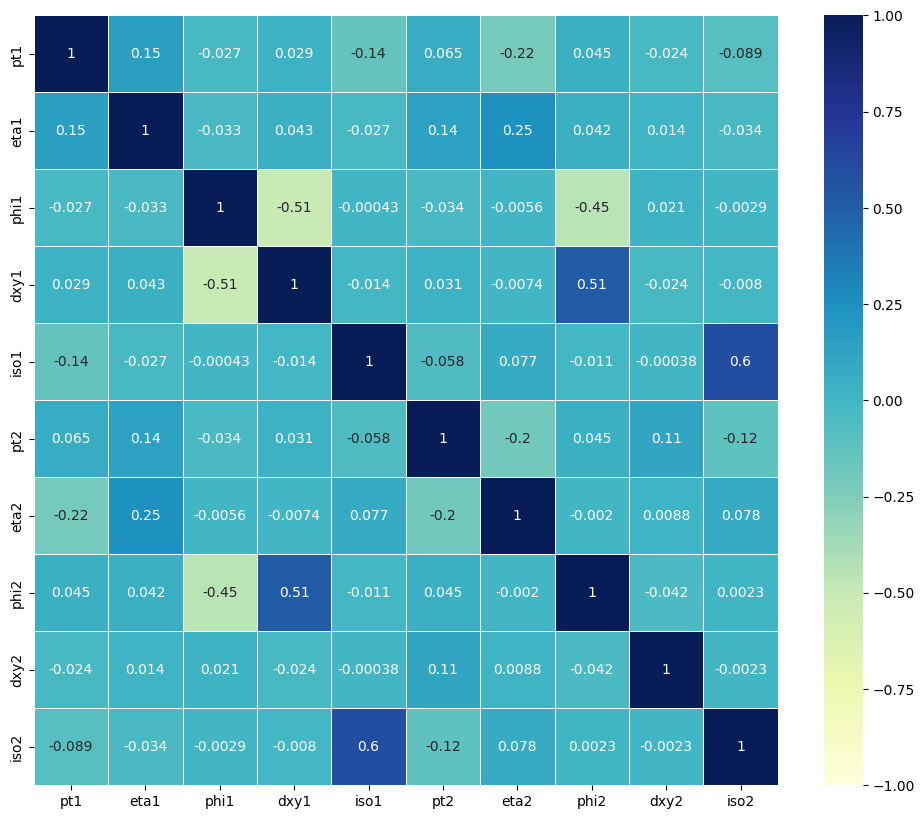

In [46]:
plt.figure(figsize=(12, 10))
sns.heatmap(particles_num2.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title("Mapa de calor para las variables numericas sin filtrar")

<Axes: >

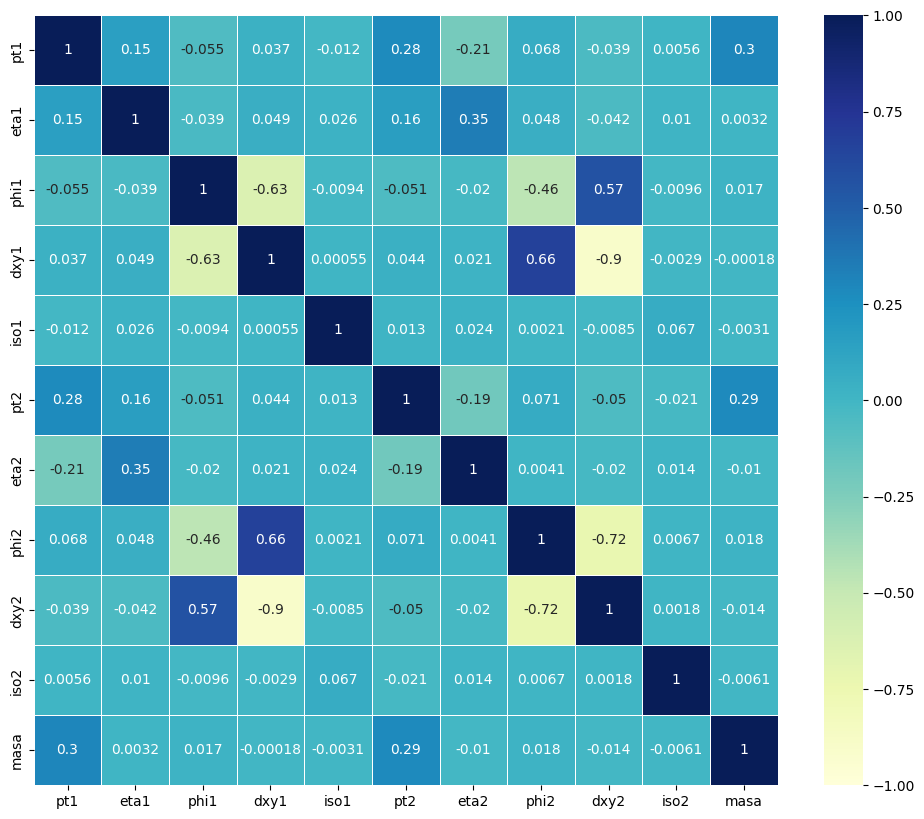

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(particles_num2_sinOutliers.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title("Mapa de Calor para variables numericas sin outliers")

notamos que las variables con mas correlacion son las siguientes

*   dxy1 y dxy2 con -0.91
*   phi2 y dxy2 con -0.72
*   dxy1 y phi2 con 0.66
*   dxy1 y phi1 con -0.63
*   phi1 y dxy2 con 0.57
*   phi1 y phi2 con -0.46










Tabla que contiene las graficas de dispersion de todas las variables numericas sin outliers

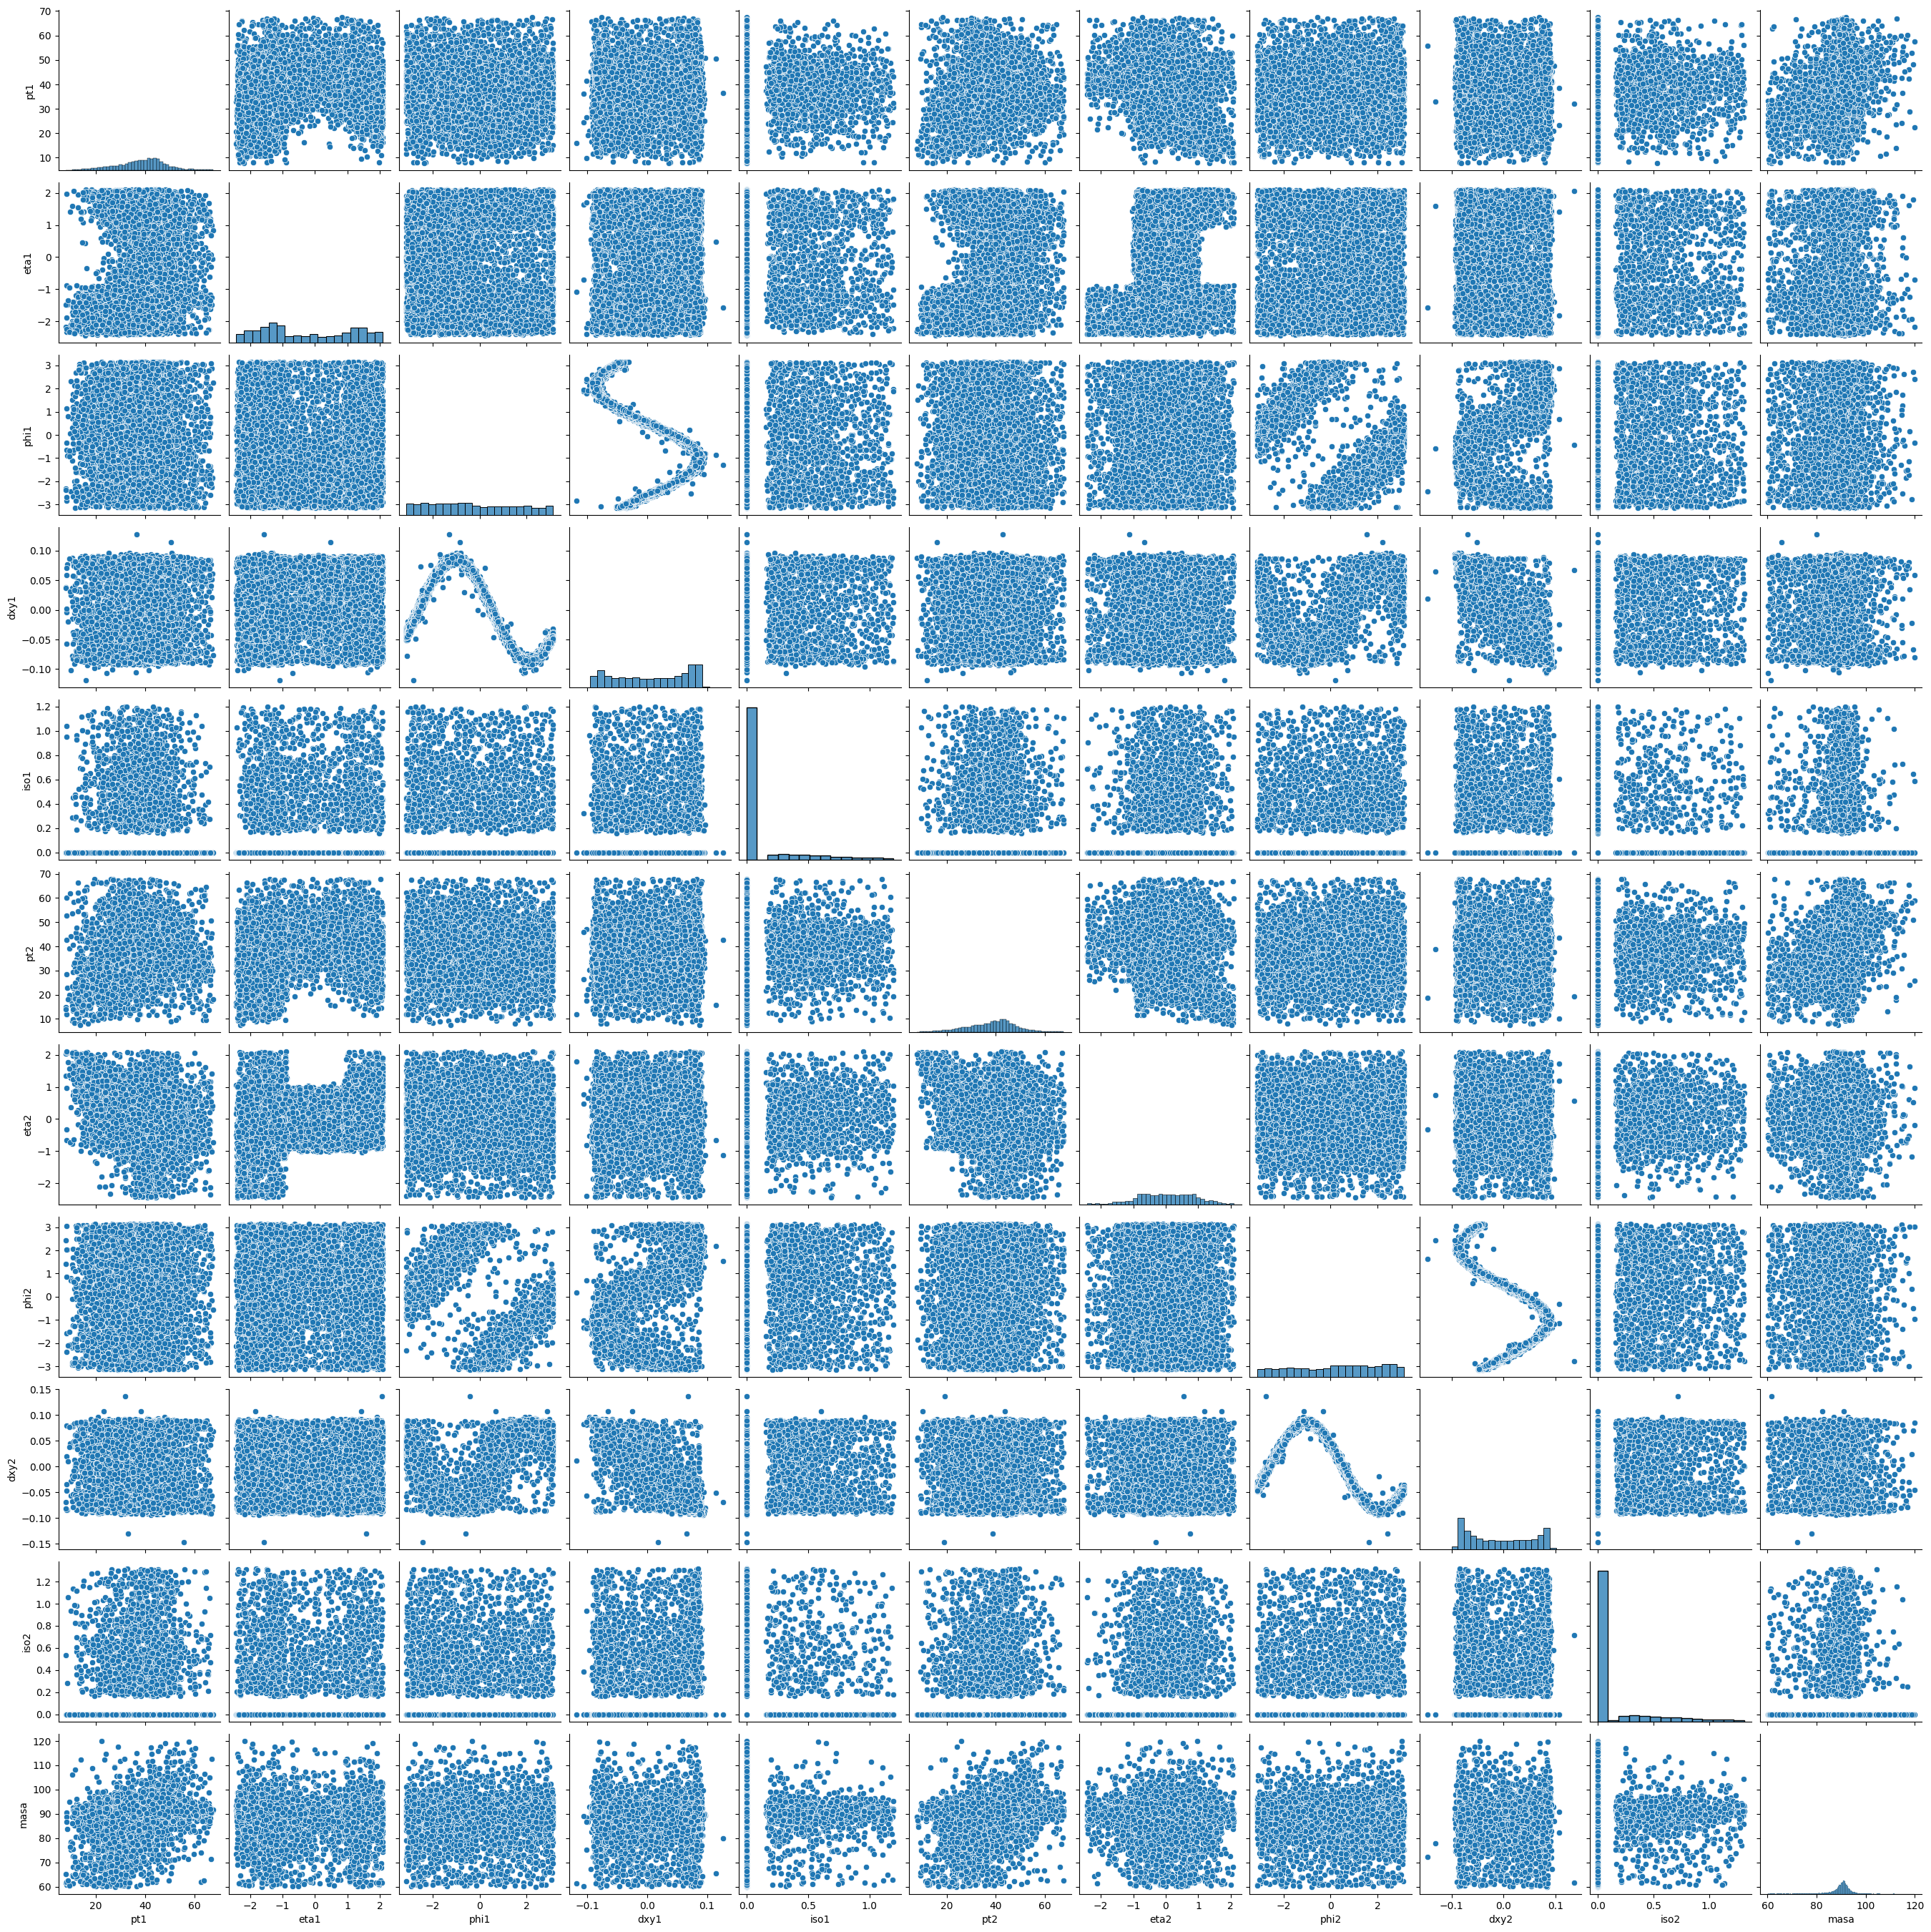

In [49]:
sns.pairplot(particles_num2_sinOutliers)

<Axes: xlabel='eta1', ylabel='eta2'>

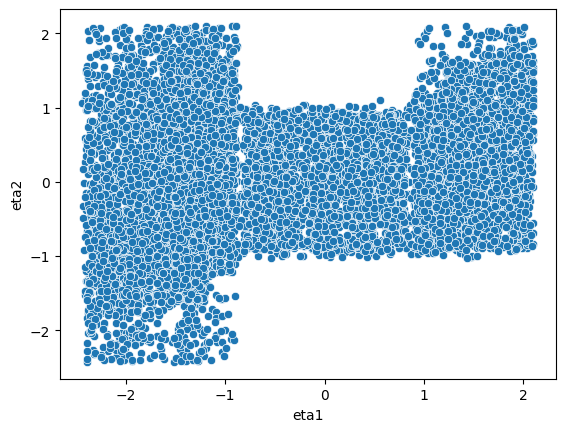

In [50]:
sns.scatterplot(data=particles, x="eta1", y="eta2")


<Axes: xlabel='phi1', ylabel='phi2'>

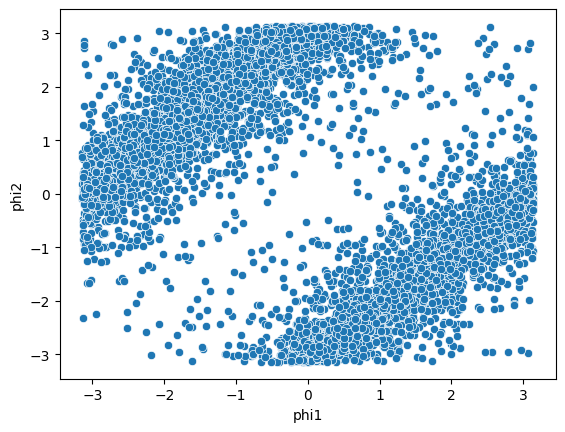

In [51]:
sns.scatterplot(data=particles, x="phi1", y="phi2")


In [52]:
particles["pt1"].corr(particles["pt2"])

0.06506380156798136

<Axes: xlabel='pt1', ylabel='pt2'>

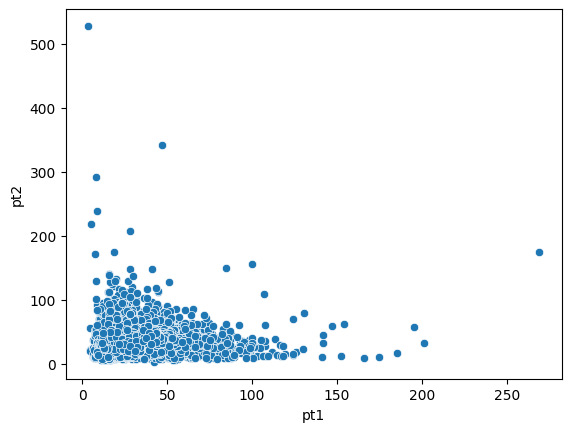

In [53]:
sns.scatterplot(data=particles, x="pt1", y="pt2")


## Masa invariante

Cuando una partícula se desintegra y, por tanto, ya no existe, su masa antes de la desintegración se puede calcular a partir de las energías y los momentos de los productos de desintegración. El valor inferido de la masa es independiente del sistema de referencia en el que se miden las energías y los momentos, por lo que la masa se denomina "invariante". El concepto se generaliza con frecuencia, de modo que para cualquier conjunto de partículas (por ejemplo, dos leptones que emergen de una colisión), se pueden aplicar las mismas fórmulas para obtener una "masa invariante" (también llamada "masa efectiva") del conjunto.

$$M^2c^2 = \left( \frac{E}{c}\right)^2-||\textbf{p}||^2$$

La masa invariante en los experimentos de colisionadores de particulas puede ser calculada de la siguiente forma:

$$ M^2 = 2p_{T_1}p_{T_2}(\cosh(\eta_1-\eta_2)-cos(\phi_1-\phi_2))$$

donde en la expresion, $p_T$ es el componente del momento el cual es perpendicular al eje del haz, $\eta$ es la pseudorapidez y $\phi$ el angulo azimutal.





Momento transversal $p_t$

La cantidad de momento de una partícula que es perpendicular a la dirección del haz. El momento transversal transportado por partículas no observadas, como los neutrinos y las partículas de materia oscura, se denomina impulso transversal "faltante" o "missing"; se puede inferir de los momentos transversales observados.


Su importancia surge porque el impulso a lo largo de la línea de luz puede ser un resto de las partículas del haz, mientras que el impulso transversal siempre está asociado con cualquier física que haya sucedido en el vértice.


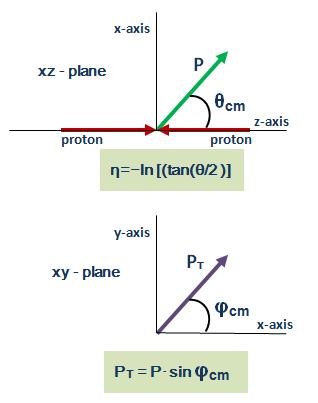

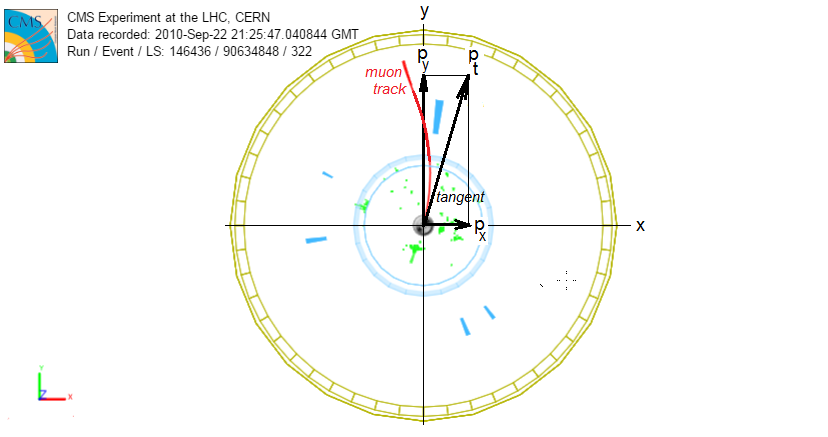

Angulo azimutal $\phi$



Se refiere al angulo polar que forma el haz con el plano XY.

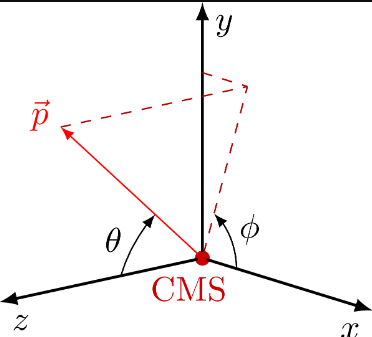

Pseudorapidez $\eta$

Es una coordenada espacial de uso común que describe el ángulo de una partícula con respecto al eje del haz. Se define como
$$\eta = -\ln\left[\tan\left(\frac{\theta}{2}\right) \right]$$

donde $\theta$ es el ángulo entre el momento de tres partículas $p$ y la dirección positiva del eje del haz.



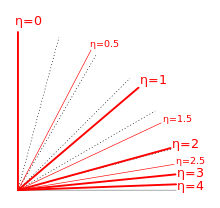
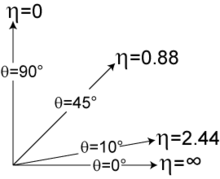

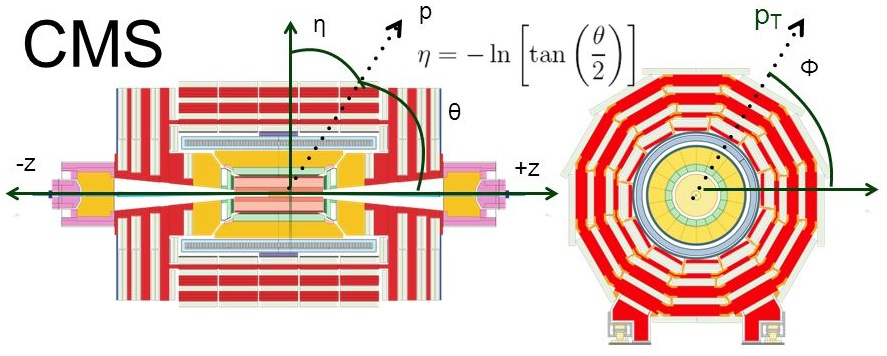

creamos una columna que contenga el calculo de la masa invariante por cada evento

In [54]:
 particles["masa"] = np.sqrt(2*particles["pt1"]*particles["pt2"]*(np.cosh(particles["eta2"]-particles["eta1"])-np.cos(particles["phi1"]-particles["phi2"])))
particles.head()

Run     Event      pt1    eta1    phi1  Q1    dxy1    iso1      pt2  \
0  165617  74969122  54.7055 -0.4324  2.5742   1 -0.0745  0.4999  34.2464   
1  165617  75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000  28.5389   
2  165617  75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000  30.2344   
3  165617  75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000  48.2790   
4  165617  75098104  41.2998 -0.1571 -3.0408   1 -0.0305  1.2280  43.4508   

     eta2    phi2  Q2    dxy2    iso2       masa  
0 -0.9885 -0.4987  -1  0.0712  3.4221  89.885919  
1  0.3852 -1.9912   1  0.0515  0.0000  88.812177  
2 -0.4684  1.8833   1 -0.0876  0.0000  88.474683  
3 -0.1956  2.9703  -1 -0.0492  0.0000  90.332429  
4  0.5910 -0.0428  -1  0.0442  0.0000  90.515882

In [55]:
#Se crea y se grafica el histograma.
fig_5=px.histogram( particles["masa"], particles["masa"])
fig_5.update_layout(title=r"Masa invariante M % d bins", xaxis_title=r"GeV", yaxis_title="Eventos")
fig_5.show()

In [56]:
 particles["masa"].mean()

87.97397983899457

In [57]:
 particles["masa"].std()

8.840568166875105

si consideramos todos los datos tenemos
$$m_Z = (87.97 \pm 8.84) GeV. $$

Usamos la formula vista para calcular la masa invariante en los experimentos de colisionadores de particulas

In [22]:
particles_num2_sinOutliers["masa"] = np.sqrt(2*particles_num2_sinOutliers["pt1"]*particles_num2_sinOutliers["pt2"]*(np.cosh(particles_num2_sinOutliers["eta2"]-particles_num2_sinOutliers["eta1"])-np.cos(particles_num2_sinOutliers["phi1"]-particles_num2_sinOutliers["phi2"])))
fig_5=px.histogram( particles_num2_sinOutliers["masa"], particles_num2_sinOutliers["masa"])
fig_5.update_layout(title=r"Masa invariante M del boson Z (datos filtrados)", xaxis_title=r"GeV", yaxis_title="Eventos")
fig_5.show()

In [71]:
particles_num2_sinOutliers["masa"].mean(), particles_num2_sinOutliers["masa"].std()

(89.26601582616945, 6.887450671528374)

$$m_z = (89.26 \pm 6.88) GeV$$

### Resolucion de datos conforme a eta

In [63]:
cond1 = 1.48
cond2 = 0.45

# Crea dos DataFrames. Selecciona los eventos de "large_etas" donde las pseudorrapideces
#de ambos muones son mayores que "cond1".
#Selecciona los eventos de "small_etas" donde
# las pseudorrapideces de ambos muones son menores que "cond2".

large_etas = particles[(np.absolute(particles.eta1) > cond1) & (np.absolute(particles.eta2) > cond1)]
small_etas = particles[(np.absolute(particles.eta1) < cond2) & (np.absolute(particles.eta2) < cond2)]

# Imprime dos lineas en blanco
print('\n' * 2)

print('La cantidad total de eventos  = %d' % len(particles))
print('La cantidad de eventos con pseudo rapidez larga en ambos muones = %d' %len(large_etas))
print('La cantidad de eventos con pseudo rapidez corta en ambos muones=  %d' %len(small_etas))




La cantidad total de eventos  = 10000
La cantidad de eventos con pseudo rapidez larga en ambos muones = 575
La cantidad de eventos con pseudo rapidez corta en ambos muones=  580


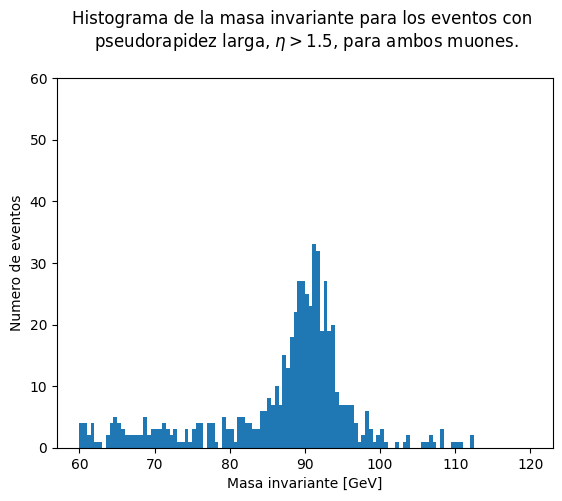

In [61]:

inv_mass1 = large_etas['masa']
plt.hist(inv_mass1, bins=120, range=(60,120))

# ajustamos los limites del eje y
axes = plt.gca()
axes.set_ylim([0,60])

# Detalles sobre el histograma
plt.xlabel('Masa invariante [GeV]')
plt.ylabel('Numero de eventos')
plt.title('Histograma de la masa invariante para los eventos con \n pseudorapidez larga, $\eta >1.5$, para ambos muones. \n')
plt.show()


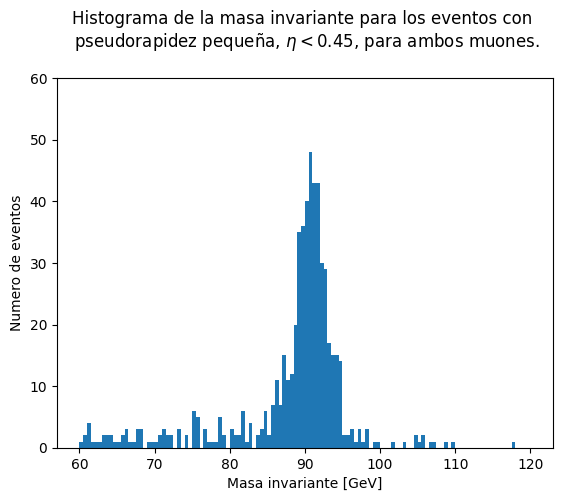

In [62]:
inv_mass2 = small_etas['masa']
plt.hist(inv_mass2, bins=120, range=(60,120))

axes = plt.gca()
axes.set_ylim([0,60])

plt.xlabel('Masa invariante [GeV]')
plt.ylabel('Numero de eventos')
plt.title('Histograma de la masa invariante para los eventos con \n pseudorapidez pequeña, $\eta < 0.45$, para ambos muones. \n')
plt.show()
